In [1]:
#più canali

In [2]:
from LibraryENGcopia import *
from tqdm.notebook import tqdm
import sklearn.preprocessing as ps
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from random import randint
from fastdtw import fastdtw
import copy
import pymc as pm
name_data = '2018-11-27T10-29-42POP 2 BL .h5'
name_data2 = '2018-11-27T12-03-02POP 2 stimulation.h5'
name_data3='2018-11-27T10-56-39MiP5 KA stimulation.h5'
name_data4='2018-11-27T11-24-28MiP3 stimulation.h5'
name_data5='2018-11-27T10-40-53POP 3 BL .h5'
complete_string='/Users/Gaia_1/Downloads/PoiProMEA-master/h5files/'+name_data
complete_string2='/Users/Gaia_1/Downloads/PoiProMEA-master/h5files/'+name_data2
complete_string3='/Users/Gaia_1/Downloads/PoiProMEA-master/h5files/'+name_data3
complete_string4='/Users/Gaia_1/Downloads/PoiProMEA-master/h5files/'+name_data4
complete_string5='/Users/Gaia_1/Downloads/PoiProMEA-master/h5files/'+name_data5

In [3]:
data = h5py.File(complete_string,'r')
#data = h5py.File(complete_string2,'r')
#data = h5py.File(complete_string3,'r')
#data = h5py.File(complete_string4,'r') #Stimulated
#data = h5py.File(complete_string5,'r') #BL

data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
labels = info_table['Label']
readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
fs = 10000 #Sampling Frequency
print(readings.shape)

(3717000, 60)


In [4]:
inizio=0
#len_data=810000 #192 secondi
len_data=len(readings)
prova=readings.iloc[inizio:len_data, :17]
prova=prova.drop([b'Ref'],axis=1)
ref=readings[b'Ref']
ref=ref[inizio:len_data]

print(prova.shape,ref.shape)

(3717000, 16) (3717000,)


In [5]:
prova_rows = range(prova.shape[0])
filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
lowcut = 300
highcut = 3000
fs=10000
order=8
b,a=butter_bandpass(lowcut,highcut,fs,order=order)
filt_ref=filtfilt(b,a,ref)
#ref_df = pd.DataFrame({b'Ref': filt_ref})
for x in tqdm(range(prova.shape[1])):
    filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
for electrode in prova.columns:
    filt_prova[electrode] = filt_prova[electrode] - filt_ref
#filt_prova = pd.concat([filt_prova, ref_df], axis=1)
prova=filt_prova
prova.shape

  0%|          | 0/16 [00:00<?, ?it/s]

(3717000, 16)

# Spike detection

In [6]:
pos_ind=[]
neg_ind=[]
for electrode in tqdm(prova.columns):
    channel=prova[electrode]
    pos, neg=find_all_spikes(channel)
    pos_ind.append(pos)
    neg_ind.append(neg)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 9673 negative spikes 8528 detected spikes: 18201 firing rate:  48.966908797417275


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 9663 negative spikes 8501 detected spikes: 18164 firing rate:  48.86736615550175


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 9675 negative spikes 8550 detected spikes: 18225 firing rate:  49.03147699757869


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 9753 negative spikes 8625 detected spikes: 18378 firing rate:  49.44309927360775


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 9611 negative spikes 8683 detected spikes: 18294 firing rate:  49.217110573042774


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 30024 negative spikes 34074 detected spikes: 64098 firing rate:  172.4455205811138


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 26061 negative spikes 11712 detected spikes: 37773 firing rate:  101.62227602905568


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 38203 negative spikes 22644 detected spikes: 60847 firing rate:  163.6992198009147


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 26228 negative spikes 14553 detected spikes: 40781 firing rate:  109.7148237826204


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 37652 negative spikes 33069 detected spikes: 70721 firing rate:  190.26365348399247


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 6258 negative spikes 8025 detected spikes: 14283 firing rate:  38.426150121065376


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 6322 negative spikes 7824 detected spikes: 14146 firing rate:  38.0575733118106


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 6533 negative spikes 8041 detected spikes: 14574 firing rate:  39.2090395480226


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 6346 negative spikes 8007 detected spikes: 14353 firing rate:  38.61447403820285


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 7781 negative spikes 6876 detected spikes: 14657 firing rate:  39.43233790691418


  0%|          | 0/3707000 [00:00<?, ?it/s]

positive spikes 6394 negative spikes 7892 detected spikes: 14286 firing rate:  38.434221146085555


BL: window 3000 (threshold 4 MAD) firing 18    
BL: window 300 (thresh 3), firing 89    
KA: window 3000 (thresh 3), firing 94    
KA: window 3000 (thresh 4), firing 29    
KA: window 300, (thresh 4) firing 39   
KA: window 300, (thresh 3) firing 108   

plt.figure(figsize=(30, 15))
plt.plot(prova, label='Signal Data')
plt.scatter(pos, [prova[i] for i in pos], c='red', marker='o', label='Local Maxima')
plt.scatter(neg, [prova[i] for i in neg], c='green', marker='o', label='Local Minima')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.title('Signal Data with Detected Spikes')
#plt.axis([0,3000,-5,5])
#plt.savefig('spikes1.jpg')
plt.show()

minima,maxima=RMM(prova)
print(len(maxima))
#segnale BASELINE: firing rate=70 (spikes 26148)
#segnale Stimulation: firing rate=69 (spikes 32980)
#segnale KA stimulation: firing rate=81 (spikes 47860)

minima,maxima=find_spikes(prova)
len(maxima)
#segnale BASELINE: firing rate=27 (spikes 10276)
#segnale Stimulation: firing rate=27 (spikes 13198)
#segnale KA stimulation: firing rate=32 (spikes 19178)

minima,maxima=find_spikes_with_memory(prova)
len(maxima)
#segnale BASELINE: firing rate=25 (spikes 9270)
#segnale Stimulation: firing rate=22 (spikes 10579)
#segnale KA stimulation: firing rate=8 (spikes 5054)

plt.figure(figsize=(30, 15))
plt.plot(prova, label='Signal Data')
plt.scatter(minima, [prova[i] for i in minima], c='red', marker='o', label='Local Minima')
plt.scatter(maxima, [prova[i] for i in maxima], c='green', marker='x', label='Local maxima')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.title('Signal Data with Detected Spikes')
#plt.axis([0,30000,-5,5])
#plt.savefig('spikes2.jpg')
plt.show()

# Cutouts

In [8]:
pos_cut=[]
neg_cut=[]
n_pos=[]
n_neg=[]

for i,electrode in enumerate(tqdm(prova.columns)):
    pos=pos_ind[i]
    neg=neg_ind[i]
    channel=prova[electrode]
    pos_cut1,n_pos1, neg_cut1,n_neg1 = cut(pos,neg,channel)
    pos_cut.append(pos_cut1)
    neg_cut.append(neg_cut1)
    n_pos.append(n_pos1)
    n_neg.append(n_neg1)
savedp = copy.deepcopy(pos_cut)
savedn = copy.deepcopy(neg_cut)

  0%|          | 0/16 [00:00<?, ?it/s]

0 9673 9673 0 8528 8528
0 9663 9663 0 8501 8501
0 9675 9675 0 8550 8550
0 9753 9753 0 8625 8625
0 9611 9611 0 8683 8683
0 30024 30024 0 34073 34073
0 26061 26061 0 11712 11712
0 38203 38203 0 22644 22644
0 26228 26228 0 14553 14553
0 37652 37652 0 33069 33069
0 6257 6257 0 8025 8025
0 6322 6322 0 7824 7824
0 6533 6533 0 8041 8041
0 6346 6346 0 8007 8007
0 7781 7781 0 6876 6876
0 6393 6393 0 7892 7892


In [9]:
for i in (tqdm(range(len(pos_cut)))):
    pos_cut[i]=mask_cuts(pos_cut[i])
    neg_cut[i]= mask_cuts(neg_cut[i])

  0%|          | 0/16 [00:00<?, ?it/s]

(9673, 30)
(8528, 30)
(9663, 30)
(8501, 30)
(9675, 30)
(8550, 30)
(9753, 30)
(8625, 30)
(9611, 30)
(8683, 30)
(30024, 30)
(34073, 30)
(26061, 30)
(11712, 30)
(38203, 30)
(22644, 30)
(26228, 30)
(14553, 30)
(37652, 30)
(33069, 30)
(6257, 30)
(8025, 30)
(6322, 30)
(7824, 30)
(6533, 30)
(8041, 30)
(6346, 30)
(8007, 30)
(7781, 30)
(6876, 30)
(6393, 30)
(7892, 30)


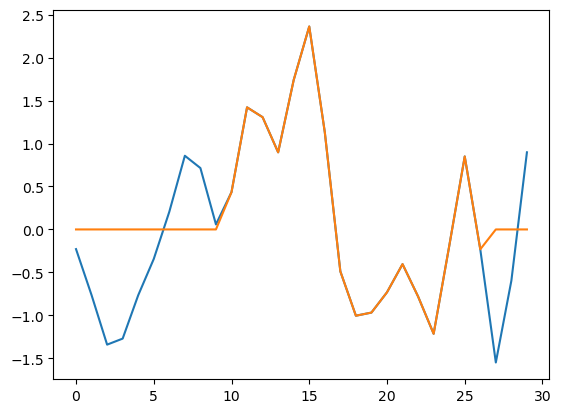

In [10]:
x=randint(1,min(len(pos_cut),len(neg_cut)))
y=randint(1,min(len(pos_cut[x]),len(neg_cut[x])))
plt.plot(savedp[x][y])
plt.plot(pos_cut[x][y])
plt.show()
#plt.plot(savedn[x])
#plt.plot(neg_cut[x])
#plt.show()

import pandas as pd
pca = PCA()
pca.fit(pos_cut)
explained_variances = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(data={'Explained Variance': explained_variances},
                                     index=range(1, len(explained_variances) + 1))
explained_variance_df.transpose()

cumulative_explained_variance = np.cumsum(explained_variances)
cumulative_explained_variance_df = pd.DataFrame(data={'Cumulative Explained Variance': cumulative_explained_variance},
                                                index=range(1, len(cumulative_explained_variance) + 1))
cumulative_explained_variance_df.transpose()


# Clustering

  0%|          | 0/16 [00:00<?, ?it/s]

Total spikes:  9673
For 2 clusters, the silhouette score is: 0.1196835486334899


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


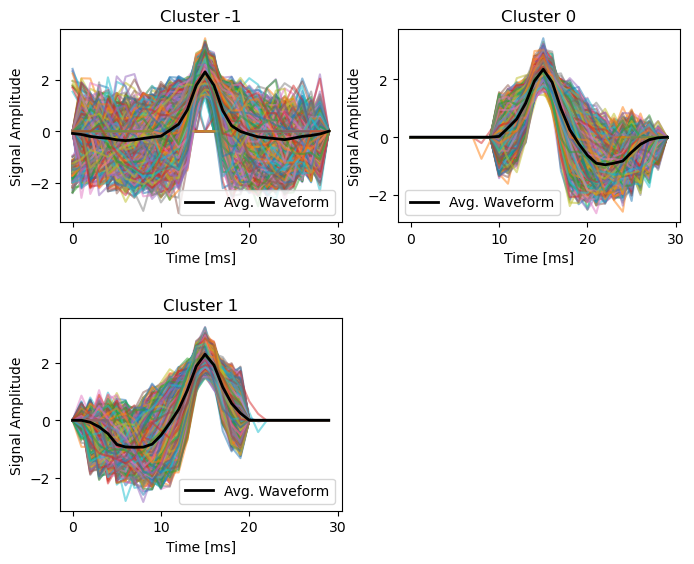

IndexError: list index out of range

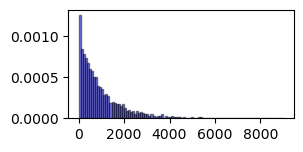

In [12]:
final_data_pos=[]
for channel in (tqdm(range(len(pos_cut)))):
    channel_clusters= clus(pos_cut[channel],'hdbscan',n_pos[channel],3,len_data)
    final_data_pos.append(channel_clusters)

BL (window 3000, thresh 4) (less function) fuzzy (1.8, 4, 3.99)   
BL (window 300) (less function) fuzzy (19, 18, 9)   
BL (window 300) (less function) dbscan (30, 9)   
BL (window 300) (bit less function std) fuzzy (8.9, 18.2, 17.8)   
BL (window 300) (more cut function) fuzzy (8.9, 17.7, 18.3)   
BL (window 300) (more cut function) dbscan (29, 6)   
BL (less cut function) fuzzy: (15, 8 ,15)   

KA (window 300, thresh 4) (less function) fuzzy (3.8, 4, 1.9)   
KA (window 3000, thresh 4) (less function) fuzzy (2.6, 1.2, 2.8)   
KA stimualtion 3 clusters fuzzy: (13, 6, 12)   
KA stim (window 300) (new cut function) (1.17,2.55,2.37)   


Total spikes:  17937
transformed
For 2 clusters, the silhouette score is: 0.14243469503714648


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


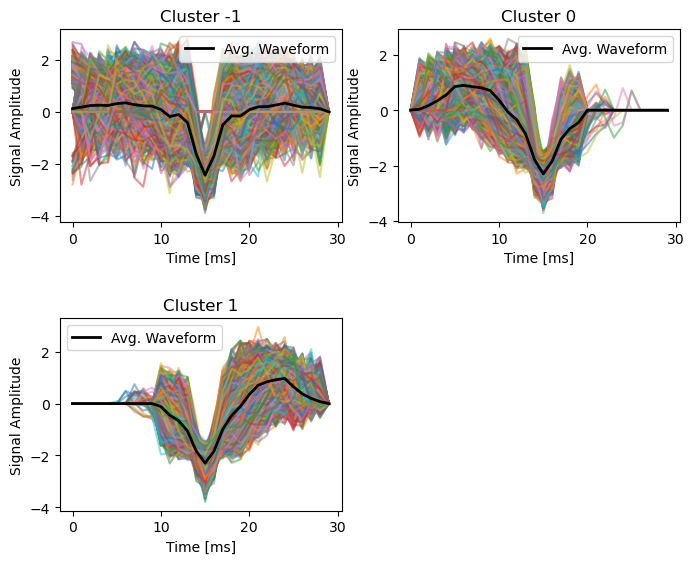

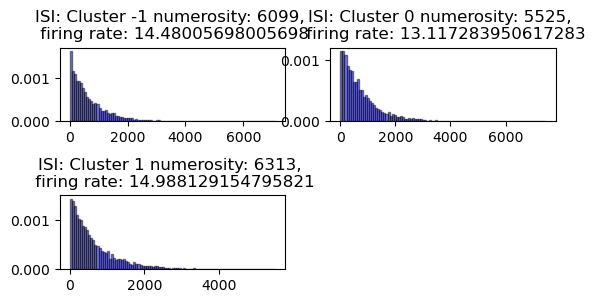

In [37]:
for i in (tqdm(range(len(neg_cut)))):
    channel_clusters= clus(neg_cut,'hdbscan',n_neg,3,len_data)
    final_data_neg.append(channel_clusters)

BL (less cut function) (window 3000, thresh4) fuzzy: (3.5, 3.5, 1.6) silhouette: 0.231    
BL (less cut function) (window 300) fuzzy: (17, 15, 6) silhouette: 0.215    
BL (more cut function) (window 300) fuzzy: (15, 16, 7) silhouette: 0.218    
BL (less cut function) fuzzy: (13, 13, 6) silhouette: 0.226    

KA (less cut function) (window 300, thresh4) fuzzy: (1.9, 1.12, 1.9) silhouette: 0.229   
KA (less cut function) (window 3000, thresh4) fuzzy: (1.4, 0.89, 1.4) silhouette: 0.223    
KA stimulation 3 clusters fuzzy: (3.9, 3.7, 2) silhouette: 0.214    
KA stimulation (more cut function) (window 3000) fuzzy: (2, 3.9, 3.7) silhouette: 0.214    
KA stimulation (more cut function) (window 300) fuzzy (4.5, 4.4, 2.2) silhouette: 0.204    
KA stimulation (more cut function) (window 300) dbscan (10.8,10.8)    

In [72]:
neurons = []
for i,neuron in enumerate(final_data_pos):
    if i>0:
        neurons.append(neuron)
for i,neuron in enumerate(final_data_neg):
    if i>0:
        neurons.append(neuron)
neurons

[array([   1586,    2611,    2788, ..., 4203083, 4203615, 4204878]),
 array([   1084,    3135,    3155, ..., 4204162, 4204577, 4204855]),
 array([   1014,    1090,    2476, ..., 4203879, 4203932, 4204788]),
 array([   1260,    2603,    3614, ..., 4204414, 4204708, 4204867])]

array([   1586,    2611,    2788, ..., 4203083, 4203615, 4204878])

In [73]:
adj_neur=[]
counter = 0
max_len=0

for neu in neurons:
    print('counter: ',counter,neu.shape[0])
    if neu.shape[0]>max_len:
        max_len=neu.shape[0]
    counter+=1
for neuron in neurons:
    if neuron.shape[0]<=max_len:
        diff = max_len-neuron.shape[0]
        adj_neur.append(np.concatenate((neuron,np.zeros([diff]))))


counter:  0 4907
counter:  1 4386
counter:  2 5525
counter:  3 6313


In [74]:
data_healthy=adj_neur[2]
ISI_healthy = np.diff(data_healthy)/10000

## Point Process

In [76]:
ISI_data=ISI_healthy

def Bayesian_mixture_model(ISI_data):
    with pm.Model() as model:
        ##### WALD DISTRIBUTION (INVERSE GAUSSIAN)
        mu1 = pm.Uniform('mu1',lower=0.01,upper=0.1)
        lam1 = pm.Uniform('lam1',lower=0.01,upper=0.04)
        obs1 = pm.Wald.dist(mu=mu1,lam=lam1)


        mu2 = pm.Uniform('mu2',lower=0,upper=0.2)
        sigma2 = pm.Uniform('sigma2',lower=0.0001,upper=0.5)
        obs2 = pm.TruncatedNormal.dist(mu=mu2, sigma=sigma2, lower=0.0)

        mu3 = pm.Uniform('mu3',lower=0.1,upper=0.6)
        sigma3 = pm.Uniform('sigma3',lower=0.0001,upper=0.5)
        obs3 = pm.TruncatedNormal.dist(mu=mu3, sigma=sigma3, lower=0.0)


        w = pm.Dirichlet('w', a=np.array([1., .4, .4]))
        #w = pm.Dirichlet('w', a=np.array([1., .4]))

        like = pm.Mixture('like', w=w, comp_dists = [obs1, obs2, obs3], observed=ISI_data)
        #like = pm.Mixture('like', w=w, comp_dists = [obs1, obs2], observed=ISI_data)
        map_estimate = pm.find_MAP(model=model)

        step = pm.NUTS(target_accept=0.9)
        trace = pm.sample(step=step,draws=1000,chains=1,tune=1000,cores=4)

        del map_estimate['w_simplex__']
        del map_estimate['mu1_interval__']
        del map_estimate['lam1_interval__']
        del map_estimate['mu2_interval__']
        del map_estimate['sigma2_interval__']
        del map_estimate['mu3_interval__']
        del map_estimate['sigma3_interval__']

        map_estimate['w1'] = map_estimate['w'][0]
        map_estimate['w2'] = map_estimate['w'][1]
        map_estimate['w3'] = map_estimate['w'][2]

        del map_estimate['w']


        return map_estimate


Sampling: [like]


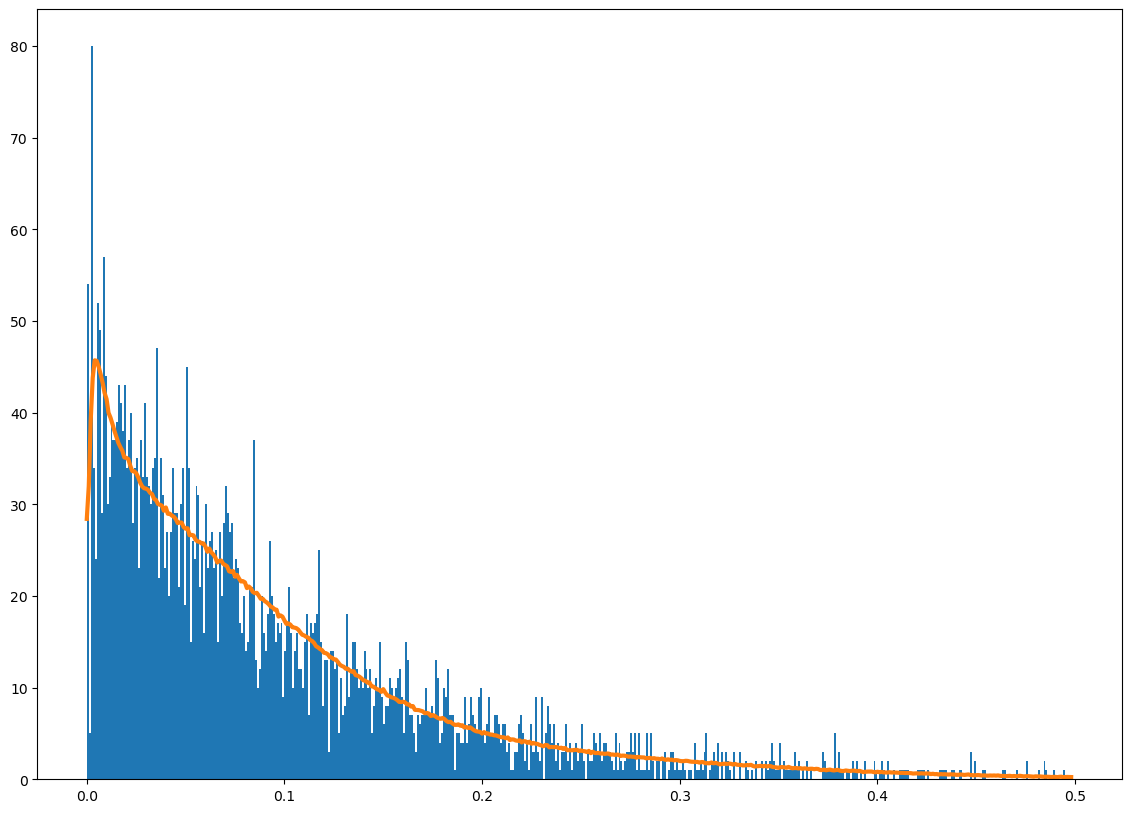

In [41]:
with model:
    ppc_trace = pm.sample_posterior_predictive(trace,model=model)

bins = np.arange(0, .5, 1e-3) 
plt.figure (figsize=(14,10))

hist = np.histogram(ppc_trace['posterior_predictive']['like'].values,bins=bins)
#plt.axis([0,0.3,0,160])
a= plt.hist(ISI_healthy,bins)
plt.plot(hist[1][:-1],hist[0]/1000,linewidth=3);

In [42]:
lista_samples=[]
for i in list(ppc_trace['posterior_predictive']['like'].values):
    lista_samples.extend(i)

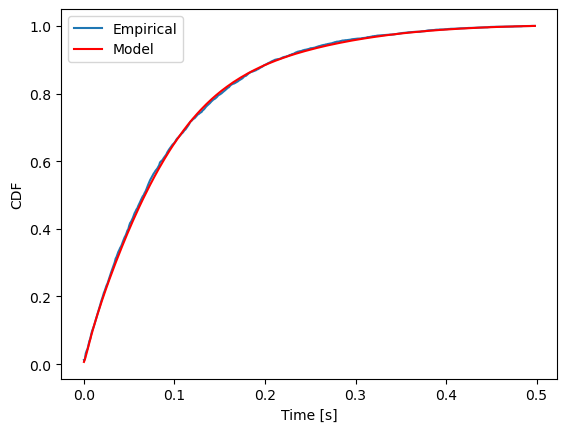

In [43]:
counts, _ = np.histogram(ISI_healthy, bins) 
prob_emp = counts / np.sum(counts)
counts, _ = np.histogram(lista_samples, bins) 
prob_model = counts / np.sum(counts)

Femp = np.cumsum(prob_emp)           
Fmodel = np.cumsum(prob_model)          
plt.figure()
plt.plot(bins[:-1], Femp)                
plt.plot(bins[:-1], Fmodel, 'r')       
#plt.xlim([0, 0.2])                  
plt.xlabel('Time [s]')
plt.ylabel('CDF')
plt.legend(['Empirical','Model'])
plt.show()

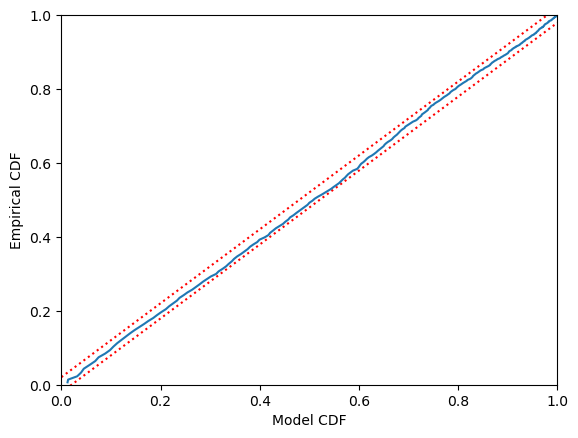

In [44]:
plt.figure()
Nlow = len(ISI_healthy)  
# Plot the confidence bounds
plt.plot([0, 1], [x + 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'r:')
plt.plot([0, 1], [x - 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'r:')
plt.plot(Femp, Fmodel)
plt.axis([0, 1, 0, 1])         
plt.xlabel('Model CDF')
plt.ylabel('Empirical CDF')
plt.show()

In [45]:
map_estimate = pm.find_MAP(model=model)
del map_estimate['w_simplex__']
del map_estimate['mu1_interval__']
del map_estimate['lam1_interval__']
del map_estimate['mu2_interval__']
del map_estimate['sigma2_interval__']
del map_estimate['mu3_interval__']
del map_estimate['sigma3_interval__']

map_estimate['w1'] = map_estimate['w'][0]
map_estimate['w2'] = map_estimate['w'][1]
map_estimate['w3'] = map_estimate['w'][2]

del map_estimate['w']


map_estimate

{'mu1': array(0.06056697),
 'lam1': array(0.0146933),
 'mu2': array(4.82974104e-09),
 'sigma2': array(0.08423077),
 'mu3': array(0.10000001),
 'sigma3': array(0.16264763),
 'w1': 0.0985460167870314,
 'w2': 0.6206849846458317,
 'w3': 0.280768998567137}

In [ ]:
dataframe = pd.DataFrame()
list_neurons = adj_neur
counter=0
print('Original number of neurons: ',len(list_neurons))
for neuron in list_neurons:
    neuron=neuron[neuron>0*10000]
    neuron=neuron[neuron<200*10000]
    print('  Neuron with ',neuron.shape[0],'spikes')
    if neuron.shape[0]>1000:

        counter+=1
    else:
        print('    Excluded neuron with n spikes = ',neuron.shape[0])
        continue

    ISI_healthy = np.diff(neuron)/10000


    map_estimate = Bayesian_mixture_model(ISI_healthy)

    df = pd.DataFrame.from_dict(map_estimate,orient='index')
    dataframe = pd.concat([dataframe,df],axis = 1)
print('Final number of neurons: ',counter)
print('Target = ',target)

Original number of neurons:  4
  Neuron with  2340 spikes


Sequential sampling (1 chains in 1 job)
NUTS: [mu1, lam1, mu2, sigma2, mu3, sigma3, w]


In [ ]:
final = dataframe.T
final.to_csv('Data after PP/DataAfter')

## Classification

In [ ]:
def performance_visualizer(trials_obj,n_models,choice=False,**choice_var):
    
    import pandas as pd
    
    performance = [1-t['result']['loss'] for t in trials_obj.trials]
    
    
    hyperparam= list(trials_obj.trials[0]['misc']['vals'].keys())
    
    values_dict ={}
    
    for i in hyperparam:
        
        values_dict[i]=[]
        
        for j in trials_obj.trials:
            
            if(len(j['misc']['vals'][i])==0):
                
                values_dict[i].append(np.NaN)
                
            else:
            
                values_dict[i].append(j['misc']['vals'][i][0])
                
    out = pd.DataFrame.from_dict(values_dict)
    
    out['performance'] = performance
    
    out=out.sort_values(by=['performance'])
    
    
    if choice:
        
        for i in list(choice_var.keys()):
        
            for j,_ in enumerate(choice_var[i]):
        
                out[i]=out[i].replace(j,choice_var[i][j])
    
    return out.tail(n_models)

In [ ]:
dataset = pd.read_csv('Data after PP/Data')
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset